# AIPI 590 - XAI | Human-AI Interaction
### A code tutorial explaining LIME in code
### Mariam Khan

[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Mkhan13/XAI/blob/main/human_ai_interaction.ipynb)

# LIME

LIME (Local Interpretable Model-agnostic Explanations) helps us understand why a machine learning model made a specific prediction by creating a local, interpretable model around one specific instance. From the explainable AI lecture, the LIME Process is:


1. Select instance of interest
2. Perturb your dataset and get black box predictions for perturbed samples
3. Generate a new dataset consisting of perturbed samples (variations of your data) and the corresponding predictions
4. Train an interpretable model, weighted by the proximity of sampled instances to the instance of interest
5. Interpret the local model to explain prediction


In [ ]:
!pip install lime

In [53]:
# Imports
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lime.lime_tabular import LimeTabularExplainer

## Load and Prepare Dataset and Model

In [59]:
digits = load_digits() # Digits dataset has handwritten digits 0-9
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Train and test split

scaler = StandardScaler() # Standardize features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestClassifier(random_state=42, n_estimators=500)
model.fit(X_train_scaled, y_train)

print("Model Accuracy:", model.score(X_test_scaled, y_test))

Model Accuracy: 0.9777777777777777


## Step 1: Select Instance of Interest

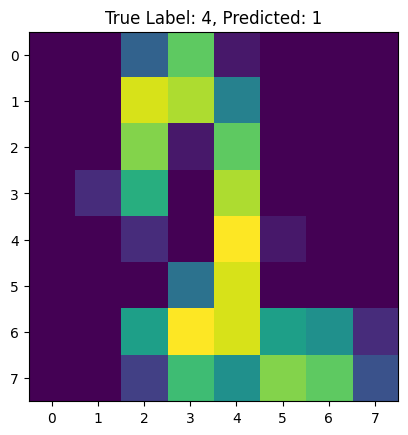

In [62]:
instance_index = 12 # Random instance to explain
sample_instance = X_test[instance_index]
true_label = y_test[instance_index]
predicted_label = model.predict([sample_instance])[0]

plt.imshow(digits.images[instance_index]) # Display image
plt.title(f"True Label: {true_label}, Predicted: {predicted_label}")
plt.show()

## Step 2/3: Perturb Your Dataset and Get Black-Box Predictions for Perturbed Samples and Generate a New Dataset

In [64]:
explainer = LimeTabularExplainer( # Initialize LIME explainer for tabular data
    training_data=X_train_scaled,
    feature_names=[f'pixel_{i}' for i in range(X.shape[1])],
    class_names=[str(i) for i in range(10)], # Convert class names to strings
    mode='classification'
)

## Step 4: Train an Interpretable Model Weighted by Proximity

## Step 5: Interpret the Local Model to Explain the Prediction